In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 0.7.6 (Python 3.4.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


# Euler Equations

The Euler equations in primitive variable form, $q = (\rho, u, p)^\intercal$ appear as:

$$q_t + A(q) q_x = 0$$

with the matrix $A(q)$:


$$A(q) = \left ( \begin{array}{ccc} u  & \rho     & 0 \\                          
                                  0  &  u       & 1/\rho \\                     
                                  0  & \gamma p & u \end{array} \right )  
$$

The sound speed is related to the adiabatic index, $\gamma$, as $c^2 = \gamma p /\rho$.

We can represent this matrix symbolically in SymPy and explore its eigensystem.

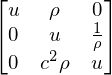

In [2]:
from sympy.abc import rho
rho, u, c = symbols('rho u c')

A = Matrix([[u, rho, 0], [0, u, rho**-1], [0, c**2 * rho, u]])
A

The eigenvalues are the speeds at which information propagates with.  SymPy returns them as a
dictionary, giving the multiplicity for each eigenvalue.

In [3]:
A.eigenvals()

The right eigenvectors are what SymPy gives natively.  For a given eigenvalue, $\lambda$, these 
satisfy:
    
$$A r = \lambda r$$

## Right Eigenvectors

In [4]:
R = A.eigenvects()   # this returns a tuple for each eigenvector with multiplicity -- unpack it
r = []
lam = []
for (ev, _, rtmp) in R:
    r.append(rtmp[0])
    lam.append(ev)
    
# we can normalize them anyway we want, so let's make the first entry 1
for n in range(len(r)):
    v = r[n]
    r[n] = v/v[0]

### 0-th right eigenvector 

In [5]:
r[0]

this corresponds to the eigenvalue

In [6]:
lam[0]

### 1-st right eigenvector

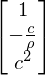

In [7]:
r[1]

this corresponds to the eigenvalue

In [8]:
lam[1]

### 2-nd right eigenvector

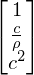

In [9]:
r[2]

this corresponds to the eigenvalue

In [10]:
lam[2]

Here they are as a matrix, $R$, in order from smallest to largest eigenvalue

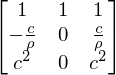

In [17]:
R = zeros(3,3)
R[:,0] = r[1]
R[:,1] = r[0]
R[:,2] = r[2]
R

## Left Eigenvectors

The left eigenvectors satisfy:

$$l A = \lambda l$$

SymPy doesn't have a method to get left eigenvectors directly, so we take the transpose of this expression:

$$(l A)^\intercal = A^\intercal l^\intercal = \lambda l^\intercal$$

Therefore, the transpose of the left eigenvectors, $l^\intercal$, are the right eigenvectors of transpose of $A$

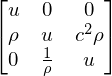

In [56]:
B = A.transpose()
B

In [66]:
L = B.eigenvects()
l = []
laml = []
for (ev, _, ltmp) in L:
    l.append(ltmp[0].transpose())
    laml.append(ev)
    

Traditionally, we normalize these such that $l^{(\mu)} \cdot r^{(\nu)} = \delta_{\mu\nu}$

In [67]:
for n in range(len(l)):
    if lam[n] == laml[n]:
        ltmp = l[n]
        p = ltmp.dot(r[n])
        l[n] = ltmp/p

### 0-th left eigenvector

In [68]:
l[0]

### 1-st left eigenvector

In [69]:
l[1]

### 2-nd left eigenvector

In [70]:
l[2]